In [1]:
import tensorflow as tf
import pandas as pd

import array 
import sklearn
from sklearn.metrics import confusion_matrix
import pylab as pl
import matplotlib.pyplot as plt

FilePath = "/home/nramvinojen/Programs/Workbench/24Jan2019/"
ext = ".jpg"

#RunFolder = "03Feb2019"
#FV_count = 2048

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print("FV len :" + str(FV_count))
print("Folder :" + RunFolder )

FV len :2048
Folder :03Feb2019


In [3]:
# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.1

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [5]:
# load json and create model
from keras.models import model_from_json
json_file = open(FilePath  + "Runs/" + RunFolder + "/ModelsAndWeights/Predict_DNN_Resnet2048FV_8Class.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/Predict_DNN_Resnet2048FV_8Class.h5")
print("Loaded model from disk")
loaded_model.summary()

Loaded model from disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 80)                163920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 40)                3240      
_________________________________________________________________
dropout_4 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 328       
Total params: 167,488
Trainable params: 167,488
Non-trainable params: 0
_________________________________________________________________


In [6]:
# load dataset
dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Fixation_WeightedSum_Combined_Csv/Test_CombinedFixation_FeatureVector.csv", header=None)
X_test = dataframe.values
# load dataset
dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Test_Label.csv", header=None)
Y_testtemp = dataframe.values
Y_test = Y_testtemp[:,0]
X_test.shape

(48, 2048)

In [7]:
predictions = loaded_model.predict(X_test)

In [8]:
#print("Predicted Labels")
y_pred = [0] * len(Y_test)
for i in range (len(Y_test)):
    a=list(predictions[i])
    y_pred[i]= a.index(max(a))
   #print(a.index(max(a)),end=" ")

In [9]:
#print("Actual Labels")
#for i in range (len(Y_test)):
   # print(int(Y_test[i]),end=" ")

In [10]:
cm = confusion_matrix(Y_test, y_pred)
print("")
print(cm)


[[3 0 1 1 0 0 0 1]
 [2 2 1 0 0 0 0 1]
 [1 1 0 0 0 2 1 1]
 [0 0 0 1 1 2 0 2]
 [0 0 0 2 3 1 0 0]
 [0 0 0 0 3 3 0 0]
 [1 1 1 1 0 0 2 0]
 [0 0 0 2 0 1 0 3]]


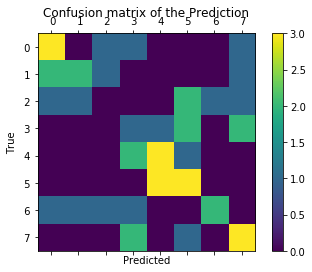

In [11]:
labels = [' 0', ' 1', ' 2', ' 3', ' 4', ' 5',' 6', ' 7']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Prediction')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels( [''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
print ('\n Summary for each class:')
print (sklearn.metrics.classification_report(Y_test, y_pred))


 Summary for each class:
             precision    recall  f1-score   support

          0       0.43      0.50      0.46         6
          1       0.50      0.33      0.40         6
          2       0.00      0.00      0.00         6
          3       0.14      0.17      0.15         6
          4       0.43      0.50      0.46         6
          5       0.33      0.50      0.40         6
          6       0.67      0.33      0.44         6
          7       0.38      0.50      0.43         6

avg / total       0.36      0.35      0.34        48

